# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json 


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = pd.read_csv("../output_data/cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [14]:
output_data_file.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
#create empty lists
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#weather api 
url = 'http://api.openweathermap.org/data/2.5/weather'

#print statement
print('Beginning Data Retrieval')
print('-----------------------------')

record = 0
set_count = 1
for city in cities:
    #create parameters for api call 
    params={
        "q":city,
        "units":"imperial",
        "appid": weather_api_key
    }
    try:
        response = requests.get(url, params)
        #print(response.url)
        results = response.json()
        #reformat to see data better
        #print(json.dumps(results, indent=4, sort_keys=True))
        cloudiness.append(results["clouds"]["all"])
        date.append(results["dt"])
        humidity.append(results["main"]["humidity"])
        lat.append(results["coord"]["lat"])
        lng.append(results["coord"]["lon"])
        max_temp.append(results["main"]["temp_max"])
        wind_speed.append(results["wind"]["speed"])
        #increase counter by one, include a set count 
        if record == 50:
            record = 1 
            set_count +=1
        else:
            record += 1
        country.append(results["sys"]["country"])
        city_name.append(city)
        print(f"Processing Record {record} of Set {set_count} | {city}")
        
    except Exception:
        print("City not found. Skipping...")

print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | emba
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | chuy
Processing Record 4 of Set 1 | esperance
Processing Record 5 of Set 1 | kurilsk
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | vostok
City not found. Skipping...
City not found. Skipping...
Processing Record 8 of Set 1 | sioux lookout
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | santa cruz do sul
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | tulle
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | bengkulu
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | saint-philippe
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | puerto ayora
City not found. Skipping...
Processing Record 20 of Set 1 | emerald
City not found. Skipping...
City not found. Skipping...

Processing Record 36 of Set 4 | vila franca do campo
Processing Record 37 of Set 4 | praia
Processing Record 38 of Set 4 | san carlos
Processing Record 39 of Set 4 | teknaf
Processing Record 40 of Set 4 | longyearbyen
Processing Record 41 of Set 4 | puerto leguizamo
Processing Record 42 of Set 4 | christchurch
Processing Record 43 of Set 4 | tortoli
Processing Record 44 of Set 4 | coahuayana
City not found. Skipping...
Processing Record 45 of Set 4 | sinnamary
Processing Record 46 of Set 4 | eirunepe
Processing Record 47 of Set 4 | yinchuan
Processing Record 48 of Set 4 | anori
Processing Record 49 of Set 4 | tupik
Processing Record 50 of Set 4 | pangnirtung
Processing Record 1 of Set 5 | lhokseumawe
Processing Record 2 of Set 5 | port blair
Processing Record 3 of Set 5 | evensk
Processing Record 4 of Set 5 | kavaratti
City not found. Skipping...
Processing Record 5 of Set 5 | east london
Processing Record 6 of Set 5 | adolfo lopez mateos
Processing Record 7 of Set 5 | qasigiannguit
Pr

Processing Record 25 of Set 8 | aubenas
Processing Record 26 of Set 8 | canico
Processing Record 27 of Set 8 | sao filipe
Processing Record 28 of Set 8 | mao
Processing Record 29 of Set 8 | novoagansk
Processing Record 30 of Set 8 | goderich
Processing Record 31 of Set 8 | choix
City not found. Skipping...
Processing Record 32 of Set 8 | yavas
Processing Record 33 of Set 8 | saint-georges
Processing Record 34 of Set 8 | bulgan
Processing Record 35 of Set 8 | mudigere
Processing Record 36 of Set 8 | tanhacu
Processing Record 37 of Set 8 | zelenoborskiy
Processing Record 38 of Set 8 | biggar
Processing Record 39 of Set 8 | miri
Processing Record 40 of Set 8 | hermon
Processing Record 41 of Set 8 | rurrenabaque
Processing Record 42 of Set 8 | haines junction
Processing Record 43 of Set 8 | semirom
Processing Record 44 of Set 8 | sola
Processing Record 45 of Set 8 | council bluffs
Processing Record 46 of Set 8 | chake chake
Processing Record 47 of Set 8 | nichinan
Processing Record 48 of S

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#create dictionary with above lists
weather_data = pd.DataFrame({
    "City":city_name,
    "Cloudiness": cloudiness,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat":lat,
    "Long":lng,
    "Max Temp":max_temp,
    "Wind Speed":wind_speed
})
#create df from weather_data
weather_df = pd.DataFrame(weather_data)
#display count of weather data
weather_df.count()

City          553
Cloudiness    553
Country       553
Date          553
Humidity      553
Lat           553
Long          553
Max Temp      553
Wind Speed    553
dtype: int64

In [6]:
#save df as CSV
weather_df.to_csv("../output_data/weather_df.csv")

#display data
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,emba,99,KZ,1584643002,71,48.83,58.14,36.41,7.65
1,mataura,50,NZ,1584643003,68,-46.19,168.86,50.00,14.00
2,chuy,3,UY,1584643003,50,-33.70,-53.46,77.09,16.84
3,esperance,75,AU,1584643003,93,-33.87,121.90,59.00,4.70
4,kurilsk,79,RU,1584643004,99,45.23,147.88,36.05,7.31


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0, 0.5, 'Temperature (F)')

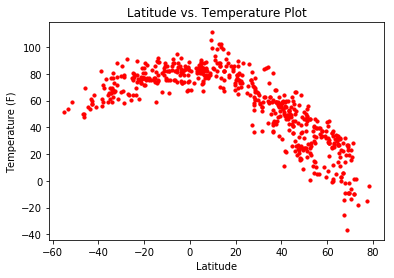

In [15]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", color="red", s=10)
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

In [ ]:
#Temperatures become warmer as latitude approaches 0 degrees

#### Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity')

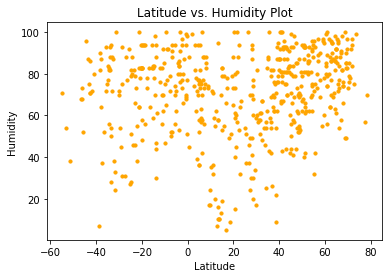

In [19]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", color="orange", s=10)
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

In [ ]:
#humidity is quite variable but shows higher humidity in latitudes 40-70

#### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness')

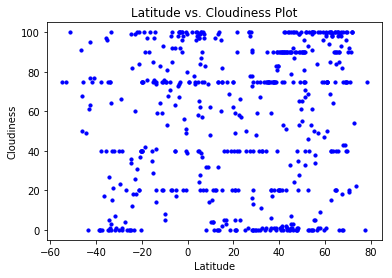

In [20]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", color="blue", s=10)
plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

In [ ]:
#cludiness to latitude is variable across temps and latitudes

#### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Windspeed')

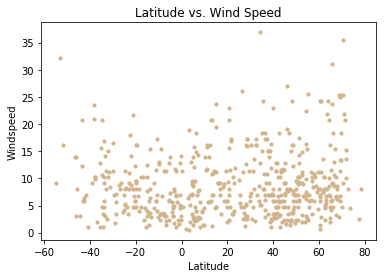

In [21]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", color="tan", s=10)
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")

In [ ]:
#windspeeds between 0-20 are present actross latitudes 

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression